# 🌸 Project #3: Classify Flowers with AI (Iris Dataset)

Welcome to another fun PyTorch mini-project!

In this notebook, we'll teach an AI model how to **identify types of Iris flowers** based on measurements. This is a **multi-class classification** problem where the model must classify the input into one of three flower species:

- Setosa
- Versicolor
- Virginica

We'll do it step-by-step:
- 💡 Concept explained like a story
- 📦 Code with best practices
- 🖼️ Visuals like graphs and heatmaps
- 🔍 Evaluation: accuracy, confusion matrix
- ✅ Quiz & takeaways


-------------
Imagine you're a robot working in a flower shop. You're given some measurements of a flower:
- Sepal length and width
- Petal length and width

Your task is to **predict the species of the flower**.

But how? 🤔
You'll learn it from examples! That’s machine learning.

We'll use the famous **Iris Dataset** for this task — it's like "Hello World" for classification problems.


### Install Jupyter Notebook
pip install notebook

### Open Notebook
python3 -m notebook

### Install Libraries
!pip install numpy pandas torch scikit-learn matplotlib seaborn

In [95]:
# Importing Libraries
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
iris = load_iris()
X = iris.data
y = iris.target

X.shape
y.shape

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [44]:
df = pd.DataFrame(X)
tg = pd.Series(y)

tg.value_counts()
df.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [77]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


In [80]:
class IrisNet(nn.Module):
    
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc = nn.Linear(4, 3)

    def forward(self, x):
        return self.fc(x)

model = IrisNet()

In [81]:
criterion = nn.CrossEntropyLoss()
optimzer = optim.Adam(model.parameters(), lr = 0.01)

In [83]:
epochs = 1000
losses = []

for epoch in range(epochs):
    optimzer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimzer.step()
    losses.append(loss.item())
    if epoch % 100 == 0:
        print(f"Epoch {epoch} Loss = {loss.item()}")
    

Epoch 0 Loss = 0.450748085975647
Epoch 100 Loss = 0.3312733471393585
Epoch 200 Loss = 0.2657057046890259
Epoch 300 Loss = 0.22053398191928864
Epoch 400 Loss = 0.18822798132896423
Epoch 500 Loss = 0.16440807282924652
Epoch 600 Loss = 0.14632390439510345
Epoch 700 Loss = 0.13223592936992645
Epoch 800 Loss = 0.12101743370294571
Epoch 900 Loss = 0.11191584169864655


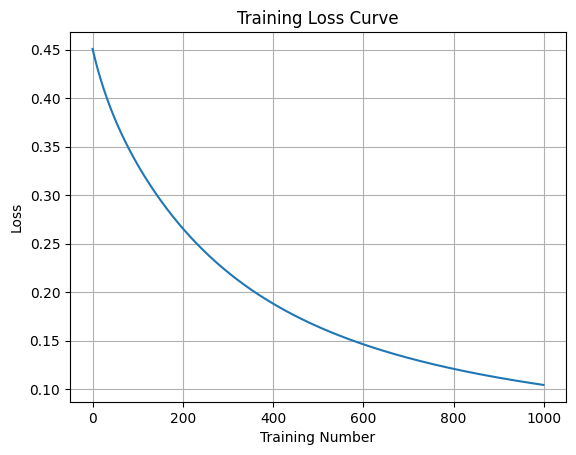

In [86]:
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Training Number")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [93]:
with torch.no_grad():
    preds = model(X_test)
    preds = torch.argmax(preds, dim=1)
    print(classification_report(y_test, preds, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[[-1.6506865  1.6517401 -2.3535075 -2.4311116]
 [ 1.8997396 -0.7677099 -1.0375502 -2.192994 ]
 [ 1.5569124 -1.8192588  2.4327426  2.3289948]]


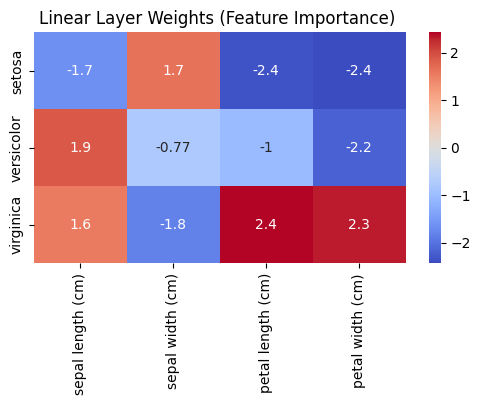

In [97]:
weights = model.fc.weight.data.numpy()
print(weights)
plt.figure(figsize=(6, 3))
sns.heatmap(weights, annot=True, cmap="coolwarm", xticklabels=iris.feature_names, yticklabels=iris.target_names)
plt.title("Linear Layer Weights (Feature Importance) ")
plt.show()